In [43]:
#Description: This program uses an artificial recurrent neural network called Long Short Term Memory(LSTM)
#             to predict the closing stock price of ULTA using the past 60 day stock price.

In [44]:
#Import the libraries
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [45]:
#Get the stock quote
df=yf.Ticker("ULTA")
df = df.history(start='2015-01-01', end='2020-12-31')
#Show the data
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,128.13,129.09,125.24,126.84,410800,0,0
2015-01-05,126.31,127.98,125.65,127.15,477400,0,0
2015-01-06,127.05,128.79,124.70,126.95,758200,0,0
2015-01-07,128.78,130.64,127.97,130.58,597200,0,0
2015-01-08,131.53,132.88,131.14,132.24,618400,0,0
...,...,...,...,...,...,...,...
2020-03-18,144.72,149.06,124.05,128.52,2367200,0,0
2020-03-19,128.81,153.65,124.33,146.99,2638300,0,0
2020-03-20,156.35,164.95,143.90,148.06,3077400,0,0


In [46]:
#Get the number of rows and columns in the data set
df.shape

(1315, 7)

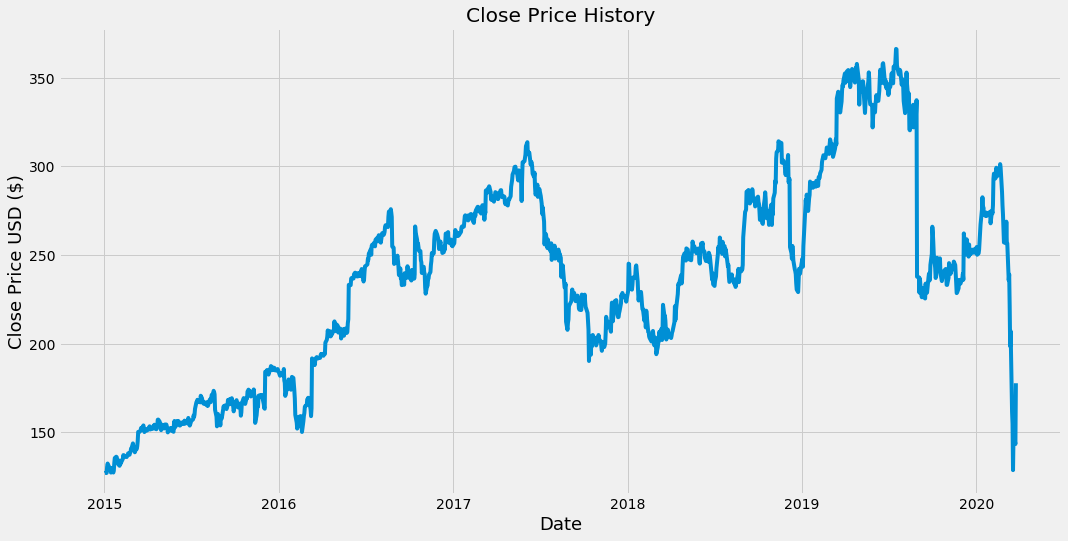

In [47]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [48]:
#Create a new dataframe with only the 'close column'
data=df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset=data.values
#Get the number of rows to train the model on
training_data_len= math.ceil(len(dataset)*.8)

training_data_len

1052

In [49]:
#Scale the data
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.        ],
       [0.00129409],
       [0.00045919],
       ...,
       [0.08858276],
       [0.0684617 ],
       [0.21185556]])

In [50]:
#Create the training data set
#Create the scaled training data set
train_data= scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train data sets
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.        , 0.00129409, 0.00045919, 0.01561261, 0.02254227,
       0.01974536, 0.01252348, 0.00822375, 0.00797328, 0.00125235,
       0.01202254, 0.00133584, 0.00630349, 0.0238781 , 0.0354832 ,
       0.03857232, 0.03757044, 0.02930495, 0.03155917, 0.02128992,
       0.01719891, 0.0292632 , 0.02154039, 0.02584012, 0.02680025,
       0.03393863, 0.04241286, 0.03782091, 0.03853058, 0.04099353,
       0.03786266, 0.04082655, 0.0420789 , 0.04658735, 0.04345648,
       0.0482154 , 0.04975997, 0.05739929, 0.05810895, 0.07004801,
       0.06341056, 0.05456063, 0.0585264 , 0.0490503 , 0.05894385,
       0.05689835, 0.06311835, 0.0750574 , 0.09709873, 0.09743269,
       0.09860154, 0.10081403, 0.10624087, 0.10511375, 0.10995617,
       0.11241912, 0.10327698, 0.09672302, 0.10169067, 0.10327698])]
[0.10022959716134416]



In [51]:
#Convert the x_train and y_train to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

#Reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(992, 60, 1)

In [52]:
#Build the LSTM model
model= Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [53]:
#Complie the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [54]:
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

Epoch 1/1
992/992 [==============================] - 54s 55ms/step - loss: 0.0035


In [55]:
#Create the testing data set
#Create a new array containing scaled values from index 991 to 1051
test_data=scaled_data[training_data_len-60: ,:]
#Create the data sets x_test and y_test, y_test is the actully predict data set
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [56]:
#Convert the data to a numpy array
x_test=np.array(x_test)

In [57]:
#Reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [58]:
#Get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [59]:
#Get the root mean squared error(RMSE)
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

2.2394555130294957

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


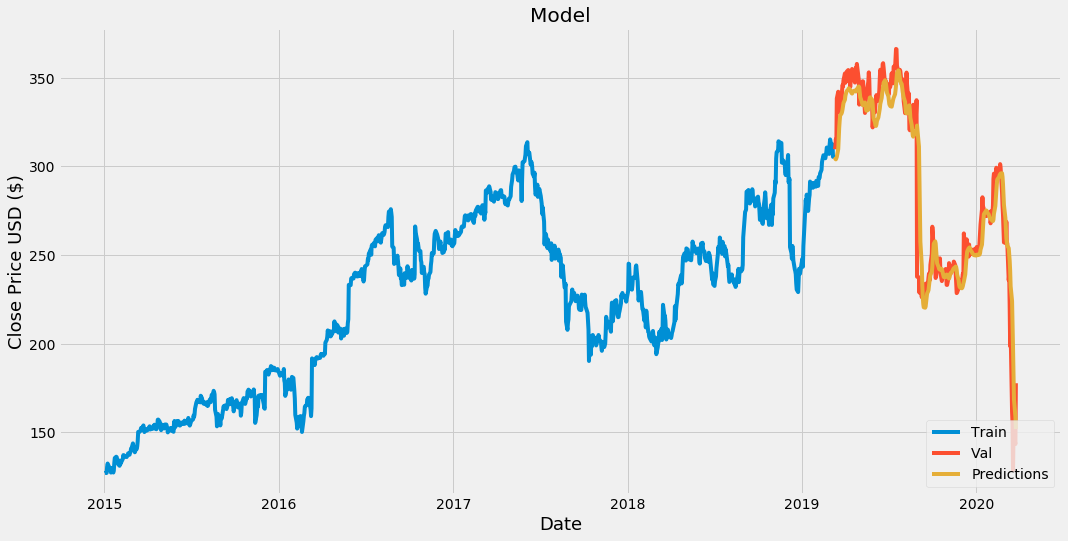

In [60]:
#Plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [61]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-03-11,309.75,305.138428
2019-03-12,311.41,304.290436
2019-03-13,315.44,304.023224
2019-03-14,312.51,304.713043
2019-03-15,338.41,305.445923
...,...,...
2020-03-18,128.52,197.445709
2020-03-19,146.99,181.460037
2020-03-20,148.06,168.414719


In [62]:
valid.tail(30)

,Close,Predictions
Date,,
2020-02-11,293.78,282.197327
2020-02-12,299.30,286.056641
2020-02-13,297.09,289.811707
2020-02-14,294.57,292.634491
2020-02-18,298.71,294.144623
2020-02-19,296.86,295.229156
2020-02-20,301.34,295.582520
2020-02-21,299.40,296.062286
2020-02-24,285.57,296.213318


In [63]:
#Get the quote
ulta_quote= yf.Ticker('ULTA')
ulta_quote= ulta_quote.history(start='2015-01-01', end='2020-03-23')
#Create a new dataframe
new_df=ulta_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days=new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled=scaler.transform(last_60_days)
#Create an empty list
X_test=[]
#Append the past 60 days 
X_test.append(last_60_days_scaled)
#Convert the X_test data set to numpy array
X_test=np.array(X_test)
#Reshape the data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Get the predicted scaled price
pred_price=model.predict(X_test)
#Undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[158.74893]]
